In [1]:
%run "Common setup.ipynb"

In [2]:
from SALib.analyze.radial_ee import analyze

In [3]:
def incremental_radialee_analysis(lower, upper, step=1):
    res, idx = [], []
    for reps in range(lower, upper, step):
        results = analyze(CIM_SPEC, numeric_vals[:reps], np_res[:reps], int(reps/step), seed=101)
        total = results.to_df()

        res.append(total.loc[tgt_param, ['mu_star', 'sigma']].tolist())
        idx.append(int(reps))
    # End for
    
    return res, idx
# End incremental_radialee_analysis()

In [4]:
numeric_samples = pd.read_csv(f'{DATA_DIR}radial_10_numeric_samples.csv', index_col=0)
numeric_vals = numeric_samples[perturbed_cols].values

In [5]:
cols = ['$\mu*$', '$\sigma$']

# Coupling disabled
radial_no_irrigation_results = pd.read_csv(f'{DATA_DIR}radial_no_irrigation_10_results.csv', index_col=0)
radial_no_irrigation_results['Avg. $/ML'].fillna(radial_no_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

np_res = radial_no_irrigation_results.loc[:, tgt_metric].values
runs = np_res.shape[0]
res, idx = incremental_radialee_analysis(54, runs+1, 54)

C:\UserData\takuya\miniconda3\envs\oat-use\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\UserData\takuya\miniconda3\envs\oat-use\lib\site-packages\numpy\core\_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
d:\userdata\takuyai\owncloud\projects\salib-roat\src\SALib\analyze\radial_ee.py:84: RuntimeWarning: invalid value encountered in true_divide
  ee[:, i] = np.nan_to_num((Y_base - Y[pos::nth]) / x_tmp)


In [6]:
disabled = pd.DataFrame(data=res, columns=cols, index=idx)

In [7]:
# Coupling enabled
radial_with_irrigation_results = pd.read_csv(f'{DATA_DIR}radial_with_irrigation_10_results.csv', index_col=0)
radial_with_irrigation_results['Avg. $/ML'].fillna(radial_with_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

np_res = radial_with_irrigation_results.loc[:, tgt_metric].values

runs = np_res.shape[0]

res, idx = incremental_radialee_analysis(54, runs+1, 54)

In [8]:
# plot_incremental_results(res, idx)
enabled = pd.DataFrame(data=res, columns=cols, index=idx)

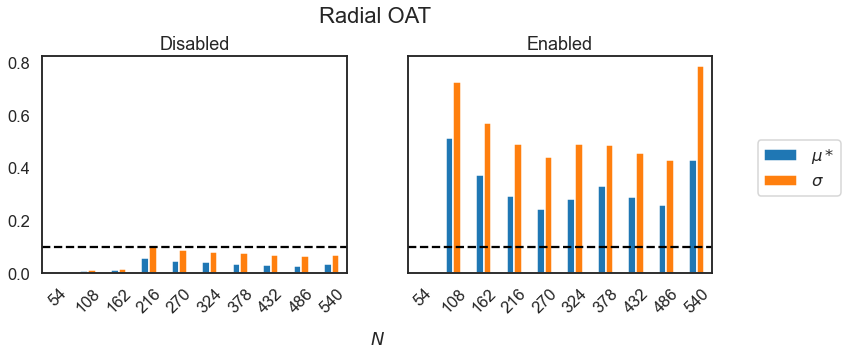

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)

disabled.plot(kind='bar', 
              legend=None,
              use_index=True,
              title='Disabled',
              ax=axes[0],
              rot=45)

enabled.plot(kind='bar', 
             legend=None,
             use_index=True,
             title='Enabled',
             ax=axes[1],
             rot=45).legend(
                bbox_to_anchor=(1.45, 0.65)
             )

axes[0].axhline(0.1, c='k', ls='--')
axes[1].axhline(0.1, c='k', ls='--')

fig.suptitle("Radial OAT", x=0.51, y=1.05, fontsize=22)
plt.xlabel("$N$", x=-0.1, labelpad=15);

In [10]:
fig.savefig(f'{FIG_DIR}radial_oat_results.png', dpi=300, bbox_inches='tight')

---

With full results

In [11]:
tgt_result_idx = all_outputs.columns.tolist().index("SW Allocation Index")

numeric_samples = to_numeric_samples(all_inputs)[perturbed_cols]

numeric_vals = numeric_samples.values
np_res = all_outputs.values[:, tgt_result_idx]
rows = np_res.shape[0]

res, idx = incremental_radialee_analysis(54, rows+1, 54)

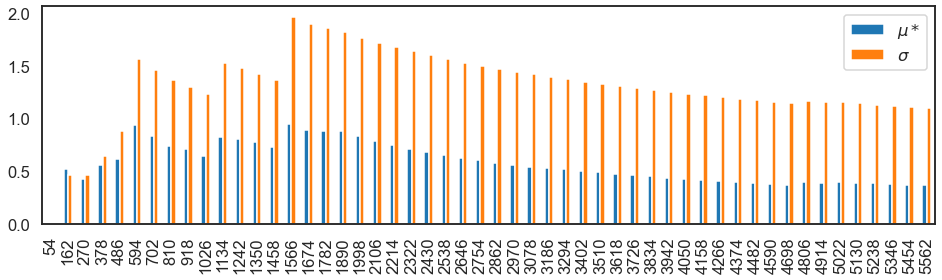

In [12]:
pd.DataFrame(data=res[::2], columns=cols, index=idx[::2]).plot(kind='bar', figsize=(16,4));